# Symbolic evaluation of Fourier coefficients

In [1]:
from sympy import *
from sympy.plotting import plot
# init_printing(pretty_print=True,use_latex=True)
# %matplotlib inline
# import matplotlib.pyplot as plt
from numpy import arange

In [2]:
f,t,T,G = symbols('f t T G')

In [3]:
f = G*t-G/2
print ('f =', f)

f = G*t - G/2


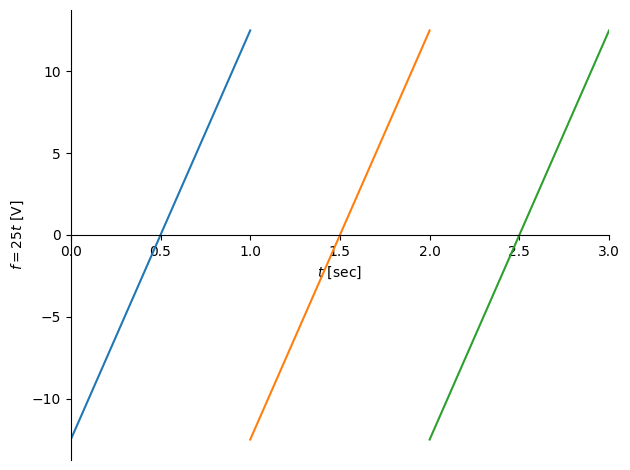

In [4]:
p = plot((f.subs(G,25),(t,0,1)),((f-25).subs(G,25),(t,1,2)),((f-50).subs(G,25),(t,2,3)), \
         ylabel = '$f = 25 t$ [V]', xlabel = '$t$ [sec]', xlim=(0,3), figsize=(10,8))

In [5]:
c0 = integrate(f,(t,0,T))*(1/T)
print(c0) 
print (c0.subs([(G,25),(T,1)]))

(G*T**2/2 - G*T/2)/T
0


In [6]:
a1 = (2/T)*integrate(f*sin(2*pi*1*t),(t,0,T))

In [7]:
print(a1)
print( a1.subs([(T,1),(pi, 3.14),(G,25)]))

2*(-G*T*cos(2*pi*T)/(2*pi) + G*sin(2*pi*T)/(4*pi**2) + G*cos(2*pi*T)/(4*pi) - G/(4*pi))/T
-7.96178343949045


In [8]:
a,b = [],[]
for n in range(10):
    a.append((2/T)*integrate(f*sin(n*pi*t),(t,0,T)))
    b.append((2/T)*integrate(f*cos(n*pi*t),(t,0,T)))

In [9]:
a[9], b[9]

(2*(-G*T*cos(9*pi*T)/(9*pi) + G*sin(9*pi*T)/(81*pi**2) + G*cos(9*pi*T)/(18*pi) - G/(18*pi))/T,
 2*(G*T*sin(9*pi*T)/(9*pi) - G*sin(9*pi*T)/(18*pi) + G*cos(9*pi*T)/(81*pi**2) - G/(81*pi**2))/T)

In [10]:

c = []
for n in range(1,10):
    print( a[n])
    expr = sqrt(a[n]**2 + b[n]**2)
    expr = expr.subs([(T,1),(pi, 3.14),(G,25)])
    # print expr
    # val = lambdify(t,expr,'numpy')
    c.append(expr)

2*(-G*T*cos(pi*T)/pi + G*sin(pi*T)/pi**2 + G*cos(pi*T)/(2*pi) - G/(2*pi))/T
2*(-G*T*cos(2*pi*T)/(2*pi) + G*sin(2*pi*T)/(4*pi**2) + G*cos(2*pi*T)/(4*pi) - G/(4*pi))/T
2*(-G*T*cos(3*pi*T)/(3*pi) + G*sin(3*pi*T)/(9*pi**2) + G*cos(3*pi*T)/(6*pi) - G/(6*pi))/T
2*(-G*T*cos(4*pi*T)/(4*pi) + G*sin(4*pi*T)/(16*pi**2) + G*cos(4*pi*T)/(8*pi) - G/(8*pi))/T
2*(-G*T*cos(5*pi*T)/(5*pi) + G*sin(5*pi*T)/(25*pi**2) + G*cos(5*pi*T)/(10*pi) - G/(10*pi))/T
2*(-G*T*cos(6*pi*T)/(6*pi) + G*sin(6*pi*T)/(36*pi**2) + G*cos(6*pi*T)/(12*pi) - G/(12*pi))/T
2*(-G*T*cos(7*pi*T)/(7*pi) + G*sin(7*pi*T)/(49*pi**2) + G*cos(7*pi*T)/(14*pi) - G/(14*pi))/T
2*(-G*T*cos(8*pi*T)/(8*pi) + G*sin(8*pi*T)/(64*pi**2) + G*cos(8*pi*T)/(16*pi) - G/(16*pi))/T
2*(-G*T*cos(9*pi*T)/(9*pi) + G*sin(9*pi*T)/(81*pi**2) + G*cos(9*pi*T)/(18*pi) - G/(18*pi))/T


Text(0, 0.5, 'Fourier coefficients $a_n^2 + b_n^2$')

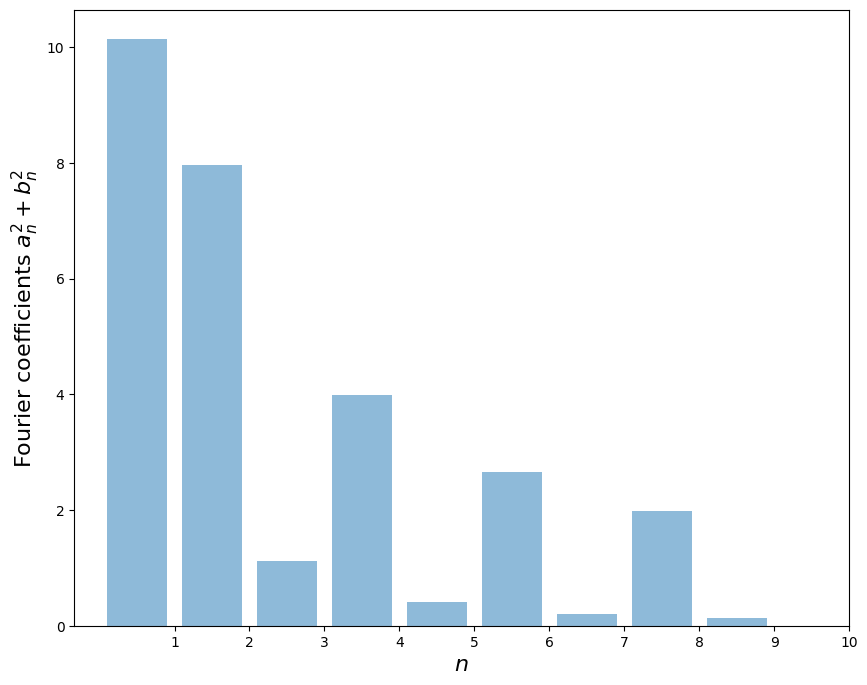

In [11]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(-.5+arange(1,10),c,alpha=.5)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xlabel('$n$',fontsize=16)
ax.set_ylabel('Fourier coefficients $a_n^2 + b_n^2$',fontsize=16)